In [1]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import ast
from gensim.models import FastText

In [ ]:
# df = pd.read_csv('cleaned_data_keywords.txt')

In [ ]:
# df.columns

Index(['date', 'sentences'], dtype='object')

### Fast-text는 txt파일이어야함

In [ ]:
# 문장 변환
import pandas as pd
import ast

# 데이터 불러오기
df = pd.read_csv('hk_sentences_1.csv')

# 'sentences' 칼럼에서 태깅을 제거하고 단어만 추출 (태그 분리)
df['text'] = df['sentences'].apply(lambda x: ' '.join([word.split('/')[0] for word in ast.literal_eval(x)]))

# 텍스트 파일로 저장
with open('hk_sentences.txt', 'w', encoding='utf-8') as f:
    for text in df['text']:
        f.write(text + '\n')



In [ ]:
import pandas as pd
import ast

df = pd.read_csv('hk_sentences_1.csv')

# 태깅 제거
df['text'] = df['sentences'].apply(lambda x: ' '.join([word[0] for word in ast.literal_eval(x)]))

# 텍스트 파일로 따로 저장해보자
with open('hk_sentences.txt', 'w', encoding='utf-8') as f:
    for text in df['text']:
        f.write(text + '\n')


### n그램 내장함수? 편하다

In [ ]:
# text 파일 읽기
with open('/content/sample_data/cleaned_data_keywords.txt', 'r', encoding='utf-8') as f:
    tokens = [line.strip().split() for line in f.readlines()] #리스트

In [ ]:
from gensim.models import FastText

# 학습
model = FastText(
    sentences=tokens,  # tokens는 텍스트 파일에서 읽은 단어 리스트여야 함
    vector_size=300, 
    window=5,
    min_count=25,
    sg=1,
    epochs=3,
    min_n=1,
    max_n=5,
    negative=5
)

# 모델 저장
model.save("업데이트.bin")


#### 순도 높은 사전을 얻지 못한 것 같다. 
    -(논문 그대로)
    vector_size=128 > 300으로 늘려버리기 > 메모리 과부하
    min_n=1 ~ max_n=5 (n그램)
    negative= 5

In [2]:
# 모델 로드
model = FastText.load("업데이트.bin")

# 예시: 모델 사용
print(model.wv["금리인상"])  # 특정 단어 입력, FastText 모델은 복합단어 가능


[ 0.28488445 -0.3065864   0.0548155  -0.00822149  0.07313827  0.15408309
 -0.14688192  0.13730937  0.03785319  0.01474491 -0.15732452  0.22435066
 -0.07345411  0.27354822 -0.10147103  0.02262285 -0.00062848 -0.12988651
 -0.1522029  -0.0818905   0.18118075  0.2066023   0.02247971 -0.08116864
 -0.22655866  0.16399886 -0.13758014 -0.34404016  0.39889205  0.13880464
  0.4040078  -0.01741497  0.31090698 -0.03572432 -0.14591941  0.07354025
  0.04738261 -0.09606393 -0.03362769  0.20676804 -0.21234478 -0.08590214
 -0.07912035 -0.0200071   0.22323547  0.1599033  -0.10702426  0.23773159
 -0.01360496  0.19907564  0.09832553 -0.12158774 -0.02985627  0.14041013
 -0.16591775 -0.01259443 -0.04550545 -0.11344734  0.01583545  0.01595455
 -0.04837182 -0.25290856 -0.10143162 -0.05382365 -0.10247338 -0.06948587
 -0.18525155  0.2576035  -0.11511842  0.30417836  0.03564642 -0.21197245
  0.14050514 -0.02361164 -0.05550092 -0.20660576  0.1909718  -0.0184369
 -0.11083558 -0.00177996 -0.10392036  0.30232647 -0.

### 벡터

In [11]:
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity

#모델 부르기
fasttext_model = FastText.load("업데이트.bin")


# 예시 단어 벡터 추출
fasttext_vector_1 = fasttext_model.wv['물가하락']
fasttext_vector_2 = fasttext_model.wv['상승']


# 유사도 계산 (Cosine Similarity)
cosine_sim_fasttext = cosine_similarity([fasttext_vector_1], [fasttext_vector_2])[0][0]

# 출력
print(f"유사도:{cosine_sim_fasttext}")



유사도:0.6569935083389282


### Fast-text 임베딩 활용

In [6]:
from gensim.models import FastText

model_path = "업데이트.bin"  # 정확한 파일 경로 입력
model = FastText.load(model_path)  # 모델 불러오기
import numpy as np
from scipy.spatial.distance import cosine

# 감성 단어 리스트 (예제)
hawkish_words = [
    "강경", "공격적", "제재", "압박", "보복", "군사", "대응", "대립", "분쟁", "전쟁", "위험", "자극",
    "불안", "위기", "공격", "반격", "저항", "독재", "억제", "억압", "단호", "무력", "충돌", "전술",
    "철강", "경제적 압박", "무역전쟁", "대립각", "강경책", "복수", "강력한", "신속한", "도발", "세력", "공격적인",
    "높", "팽창", "인상", "매파", "성장", "투기", "억제", "인플레이션", "상승", "압력", "증가", "위험", "선호",
    "상회", "물가 상승", "광려", "금리 상승", "확장", "상방 압력", "긴축", "변동성 감소", "흑자", "채권 가격 하락",
    "견조", "요금 인상", "낙관", "부동산 가격 상승", "상향", "부동산 변동성", "매파", "억제", "우려", "경기 투자",
    "조짐", "방지"
]

dovish_words = [
    "평화", "협력", "완화", "타협", "외교", "대화", "조정", "중재", "합의", "화해", "안정", "협상",
    "협약", "교류", "관계", "회담", "평화적", "소통", "융화", "유화", "국제적", "상호이해", "신뢰",
    "공동체", "존중", "연대", "공존", "구호", "공동선", "평화주의", "유연한", "지속적", "소극적", "융통성",
    "친선", "구속력", "구속적", "낮", "축소", "인하", "비둘기", "둔화", "악화", "회복", "하락", "못하", "감소",
    "위험", "위축", "금리", "하방", "침체", "완화", "변동성", "확대", "적자", "채권", "가격 상승", "부진",
    "요금 인하", "부동산 가격 하락", "하향", "채권", "압력", "회피"
]

# 단어 임베딩 벡터 평균 구하기
def get_average_vector(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else None

hawkish_vector = get_average_vector(hawkish_words, model)
dovish_vector = get_average_vector(dovish_words, model)

# 감성 점수 계산 함수
def get_polarity_score(word, model, hawkish_vector, dovish_vector):
    if word not in model.wv:
        return None

    word_vector = model.wv[word]
    hawkish_sim = 1 - cosine(word_vector, hawkish_vector)
    dovish_sim = 1 - cosine(word_vector, dovish_vector)

    return hawkish_sim / dovish_sim  # 비율 기반 극성 점수

# 테스트 실행
test_word = "매파"
print(get_polarity_score(test_word, model, hawkish_vector, dovish_vector))



1.1501678820631756


### 부트스트래핑 반복

#### 특정단어가 매파적인지 비둘파적인지 판단하기 위한 과정

In [19]:
import numpy as np
from scipy.spatial.distance import cosine

# 감성 단어 리스트 , # 사실 더 만들면 훨씬 정확도가 높아짐.
hawkish_words = [
    "강경", "공격적", "제재", "압박", "보복", "군사", "대응", "대립", "분쟁", "전쟁", "위험", "자극",
    "불안", "위기", "공격", "반격", "저항", "독재", "억제", "억압", "단호", "무력", "충돌", "전술",
    "철강", "경제적 압박", "무역전쟁", "대립각", "강경책", "복수", "강력한", "신속한", "도발", "세력", "공격적인",
    "높", "팽창", "인상", "매파", "성장", "투기", "억제", "인플레이션", "상승", "압력", "증가", "위험", "선호",
    "상회", "물가 상승", "광려", "금리 상승", "확장", "상방 압력", "긴축", "변동성 감소", "흑자", "채권 가격 하락",
    "견조", "요금 인상", "낙관", "부동산 가격 상승", "상향", "부동산 변동성", "매파", "억제", "우려", "경기 투자",
    "조짐", "방지"
]

dovish_words = [
    "평화", "협력", "완화", "타협", "외교", "대화", "조정", "중재", "합의", "화해", "안정", "협상",
    "협약", "교류", "관계", "회담", "평화적", "소통", "융화", "유화", "국제적", "상호이해", "신뢰",
    "공동체", "존중", "연대", "공존", "구호", "공동선", "평화주의", "유연한", "지속적", "소극적", "융통성",
    "친선", "구속력", "구속적", "낮", "축소", "인하", "비둘기", "둔화", "악화", "회복", "하락", "못하", "감소",
    "위험", "위축", "금리", "하방", "침체", "완화", "변동성", "확대", "적자", "채권", "가격 상승", "부진",
    "요금 인하", "부동산 가격 하락", "하향", "채권", "압력", "회피"
]

# 감성 단어를 10개의 하위 집합으로 분할
hawkish_subsets = np.array_split(hawkish_words, 10)
dovish_subsets = np.array_split(dovish_words, 10)

# 부트스트래핑(랜덤 샘플링) 50회 반복
boot_polarity_scores = []

for _ in range(1000):
    # 랜덤 하위 집합 선택
    hawkish_sample = np.random.choice(hawkish_words, size=len(hawkish_words)//2, replace=False)
    dovish_sample = np.random.choice(dovish_words, size=len(dovish_words)//2, replace=False)

    # 감성 벡터 업데이트
    hawkish_vector = get_average_vector(hawkish_sample, model)
    dovish_vector = get_average_vector(dovish_sample, model)

    # 특정 단어 감성 점수 계산 
    test_word = "매파"
    score = get_polarity_score(test_word, model, hawkish_vector, dovish_vector)

    if score is not None:
        boot_polarity_scores.append(score)

# 평균 감성 점수 출력
final_polarity_score = np.mean(boot_polarity_scores)
print(f"부트스트래핑 평균 극성 점수: {final_polarity_score:.3f}")


부트스트래핑 평균 극성 점수: 1.160


### 말도 안되는 점수에 재수정

### 매파 비둘기파 사전 구축

In [22]:
import random
from gensim.models import FastText
import numpy as np

# FastText 모델 로드
model = FastText.load("업데이트.bin")

# 초기 매파 및 비둘기파 단어 리스트
hawkish_words = [
    "강경", "공격적", "제재", "압박", "보복", "군사", "대응", "대립", "분쟁", "전쟁", "위험", "자극",
    "불안", "위기", "공격", "반격", "저항", "독재", "억제", "억압", "단호", "무력", "충돌", "전술",
    "철강", "경제적 압박", "무역전쟁", "대립각", "강경책", "복수", "강력한", "신속한", "도발", "세력", "공격적인",
    "높", "팽창", "인상", "매파", "성장", "투기", "억제", "인플레이션", "상승", "압력", "증가", "위험", "선호",
    "상회", "물가 상승", "광려", "금리 상승", "확장", "상방 압력", "긴축", "변동성 감소", "흑자", "채권 가격 하락",
    "견조", "요금 인상", "낙관", "부동산 가격 상승", "상향", "부동산 변동성", "매파", "억제", "우려", "경기 투자",
    "조짐", "방지"
]

dovish_words = [
    "평화", "협력", "완화", "타협", "외교", "대화", "조정", "중재", "합의", "화해", "안정", "협상",
    "협약", "교류", "관계", "회담", "평화적", "소통", "융화", "유화", "국제적", "상호이해", "신뢰",
    "공동체", "존중", "연대", "공존", "구호", "공동선", "평화주의", "유연한", "지속적", "소극적", "융통성",
    "친선", "구속력", "구속적", "낮", "축소", "인하", "비둘기", "둔화", "악화", "회복", "하락", "못하", "감소",
    "위험", "위축", "금리", "하방", "침체", "완화", "변동성", "확대", "적자", "채권", "가격 상승", "부진",
    "요금 인하", "부동산 가격 하락", "하향", "채권", "압력", "회피"
]

# ✅ 단어들의 평균 벡터 계산 함수 (오류 수정)
def get_average_vector(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# ✅ 부트스트래핑을 통해 단어 목록 확장하는 함수
def bootstrap_lexicon(seed_words, model, iterations=50, subset_size=10):
    expanded_lexicon = set(seed_words)
    for _ in range(iterations):
        subset = random.sample(seed_words, min(subset_size, len(seed_words)))
        subset_vector = get_average_vector(subset, model)
        similar_words = model.wv.most_similar(positive=[subset_vector], topn=10)
        expanded_lexicon.update([word for word, _ in similar_words])
    return expanded_lexicon

# ✅ 확장된 단어 목록 생성
hawkish_expanded = bootstrap_lexicon(hawkish_words, model)
dovish_expanded = bootstrap_lexicon(dovish_words, model)

# ✅ 확장된 단어 목록을 파일로 저장
with open("hawkish_words_expanded.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(hawkish_expanded))

with open("dovish_words_expanded.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(dovish_expanded))

print("저장")


저장


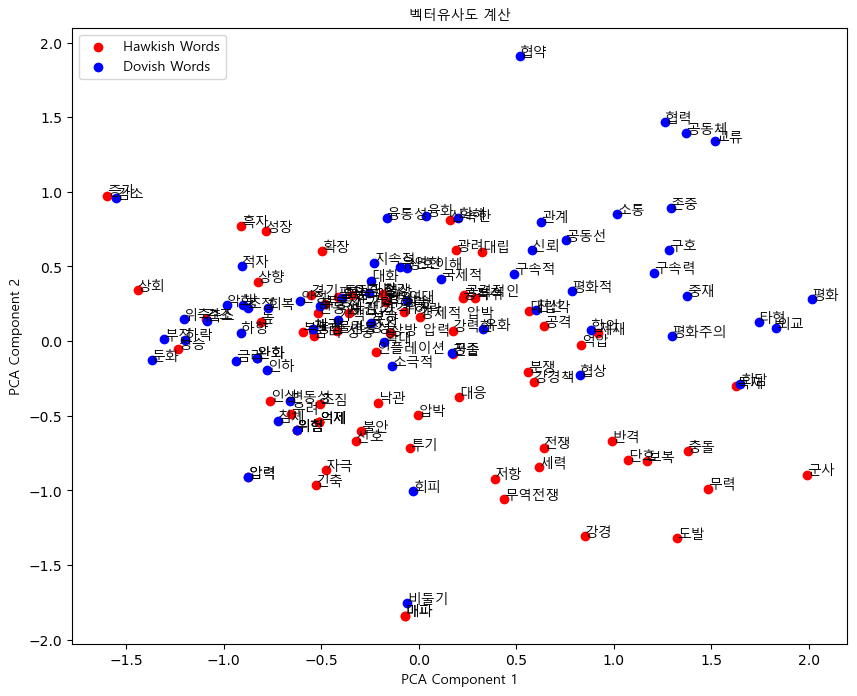

In [28]:
import gensim
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import FastText

# FastText 모델 로드
model = FastText.load('업데이트.bin')  # 학습된 FastText 모델 로드

# hawkish_words와 dovish_words 리스트
hawkish_words = [
    "강경", "공격적", "제재", "압박", "보복", "군사", "대응", "대립", "분쟁", "전쟁", "위험", "자극",
    "불안", "위기", "공격", "반격", "저항", "독재", "억제", "억압", "단호", "무력", "충돌", "전술",
    "철강", "경제적 압박", "무역전쟁", "대립각", "강경책", "복수", "강력한", "신속한", "도발", "세력", "공격적인",
    "높", "팽창", "인상", "매파", "성장", "투기", "억제", "인플레이션", "상승", "압력", "증가", "위험", "선호",
    "상회", "물가 상승", "광려", "금리 상승", "확장", "상방 압력", "긴축", "변동성 감소", "흑자", "채권 가격 하락",
    "견조", "요금 인상", "낙관", "부동산 가격 상승", "상향", "부동산 변동성", "매파", "억제", "우려", "경기 투자",
    "조짐", "방지"
]

dovish_words = [
    "평화", "협력", "완화", "타협", "외교", "대화", "조정", "중재", "합의", "화해", "안정", "협상",
    "협약", "교류", "관계", "회담", "평화적", "소통", "융화", "유화", "국제적", "상호이해", "신뢰",
    "공동체", "존중", "연대", "공존", "구호", "공동선", "평화주의", "유연한", "지속적", "소극적", "융통성",
    "친선", "구속력", "구속적", "낮", "축소", "인하", "비둘기", "둔화", "악화", "회복", "하락", "못하", "감소",
    "위험", "위축", "금리", "하방", "침체", "완화", "변동성", "확대", "적자", "채권", "가격 상승", "부진",
    "요금 인하", "부동산 가격 하락", "하향", "채권", "압력", "회피"
]

# 2. 단어 벡터 가져오기
words = hawkish_words + dovish_words
word_vectors = np.array([model.wv[word] for word in words if word in model.wv])

# 3. 유사도 계산 (예: 모든 단어들의 pairwise cosine similarity 계산)
cos_sim_matrix = cosine_similarity(word_vectors)

# 4. PCA로 차원 축소 (2D로)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# 5. 산점도 시각화
plt.figure(figsize=(10, 8))

# 'red'는 hawkish_words, 'blue'는 dovish_words로 구분
scatter_hawkish = plt.scatter(word_vectors_2d[:len(hawkish_words), 0], word_vectors_2d[:len(hawkish_words), 1], c='red')
scatter_dovish = plt.scatter(word_vectors_2d[len(hawkish_words):, 0], word_vectors_2d[len(hawkish_words):, 1], c='blue')

# 단어 라벨 추가
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontproperties='Malgun Gothic')

# 레이블 설정
plt.title('벡터유사도 계산', fontproperties='Malgun Gothic')
plt.xlabel('PCA Component 1', fontproperties='Malgun Gothic')
plt.ylabel('PCA Component 2', fontproperties='Malgun Gothic')

# 범례 설정: scatter 객체를 이용하여 범례 추가
plt.legend([scatter_hawkish, scatter_dovish], ['Hawkish Words', 'Dovish Words'], loc='upper left', prop={'family': 'Malgun Gothic'})

plt.show()
